In [15]:
import sys
print (sys.executable)

/opt/anaconda3/bin/python


Show the path to the installed pandas package

In [16]:
import pandas
import sklearn

print(pandas.__file__)  
print(sklearn.__file__) 


/opt/anaconda3/lib/python3.12/site-packages/pandas/__init__.py
/opt/anaconda3/lib/python3.12/site-packages/sklearn/__init__.py


Data Preparation

In [17]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

twenty_train.data[0:2]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [18]:
from sklearn.datasets import load_files
import os

dataset_path = "/Users/liaojingwen/Desktop/20news-bydate/"

twenty_train = load_files(os.path.join(dataset_path, '20news-bydate-train'), encoding='latin1', shuffle=True, random_state=42)

print(f"Number of documents loaded: {len(twenty_train.data)}")
# Convert it to a DataFrame for easier manipulation
import pandas as pd
df = pd.DataFrame({'text': twenty_train.data, 'category': twenty_train.target})

# Map the category indices to category names
df['category_name'] = df['category'].apply(lambda x: twenty_train.target_names[x])

print(df.head(10))
print(f"Total number of documents: {len(df)}")

Number of documents loaded: 11314
                                                text  category  \
0  From: wtm@uhura.neoucom.edu (Bill Mayhew)\nSub...        12   
1  From: andy@SAIL.Stanford.EDU (Andy Freeman)\nS...         6   
2  From: cs1442aq@news.uta.edu (cs1442aq)\nSubjec...         9   
3  From: cjackson@adobe.com (Curtis Jackson)\nSub...         8   
4  From: frp@table.NSD.3Com.COM (Frank R. Pereira...         6   
5  From: grady@world.std.com (Dick Grady)\nSubjec...         7   
6  Subject: Re: Finnally, the Phils have support\...         9   
7  Subject: DOS 6.)\nFrom: darren.lavallee@cld9.s...         2   
8  From: berryh@huey.udel.edu (John Berryhill, Ph...        13   
9  From: Thyagi@cup.portal.com (Thyagi Morgoth Na...        19   

             category_name  
0          sci.electronics  
1             misc.forsale  
2       rec.sport.baseball  
3          rec.motorcycles  
4             misc.forsale  
5                rec.autos  
6       rec.sport.baseball  
7  comp

In [22]:
print("First 10 Document Categories:")
for i in range(10):
    print(f"Document {i+1}: {df['category_name'].iloc[i]}")

First 10 Document Categories:
Document 1: sci.electronics
Document 2: misc.forsale
Document 3: rec.sport.baseball
Document 4: rec.motorcycles
Document 5: misc.forsale
Document 6: rec.autos
Document 7: rec.sport.baseball
Document 8: comp.os.ms-windows.misc
Document 9: sci.med
Document 10: talk.religion.misc


Exercise 1

In [19]:
for i in range(3):
    print(f"Document {i+1}:\n{df['text'].iloc[i]}\n")
    print(f"Category: {df['category_name'].iloc[i]}\n")
    

Document 1:
From: wtm@uhura.neoucom.edu (Bill Mayhew)
Subject: Re: How to the disks copy protected.
Organization: Northeastern Ohio Universities College of Medicine
Lines: 23

Write a good manual to go with the software.  The hassle of
photocopying the manual is offset by simplicity of purchasing
the package for only $15.  Also, consider offering an inexpensive
but attractive perc for registered users.  For instance, a coffee
mug.  You could produce and mail the incentive for a couple of
dollars, so consider pricing the product at $17.95.

You're lucky if only 20% of the instances of your program in use
are non-licensed users.

The best approach is to estimate your loss and accomodate that into
your price structure.  Sure it hurts legitimate users, but too bad.
Retailers have to charge off loss to shoplifters onto paying
customers; the software industry is the same.

Unless your product is exceptionally unique, using an ostensibly
copy-proof disk will just send your customers to the co

Exercise 2&3

In [24]:
# Query for documents in the sci.med category and show every 5th document
sci_med_docs = df[df['category_name'] == 'sci.med']
print(sci_med_docs.iloc[::5].head())

                                                  text  category  \
8    From: berryh@huey.udel.edu (John Berryhill, Ph...        13   
107  From: texx@ossi.com (Robert "Texx" Woodworth)\...        13   
235  From: ron.roth@rose.com (ron roth)\nSubject: S...        13   
358  From: klier@iscsvax.uni.edu\nSubject: Re: How ...        13   
410  From: julkunen@messi.uku.fi (Antero Julkunen)\...        13   

    category_name                                             tokens  
8         sci.med  [From, :, berryh, @, huey.udel.edu, (, John, B...  
107       sci.med  [From, :, texx, @, ossi.com, (, Robert, ``, Te...  
235       sci.med  [From, :, ron.roth, @, rose.com, (, ron, roth,...  
358       sci.med  [From, :, klier, @, iscsvax.uni.edu, Subject, ...  
410       sci.med  [From, :, julkunen, @, messi.uku.fi, (, Antero...  


Data Mining using Pandas
    4.1 Missing Values

In [31]:
print("Missing Values in Dataset:\n", df.isnull().sum())
df.dropna(inplace=True)
print("After Removal of Missing Values:\n", df.isnull().sum())

Missing Values in Dataset:
 text                    0
category                0
category_name           0
tokens                  0
missing_values_count    0
dtype: int64
After Removal of Missing Values:
 text                    0
category                0
category_name           0
tokens                  0
missing_values_count    0
dtype: int64


Exercise 4

In [32]:
df['missing_values_count'] = df.isnull().sum(axis=1)

df_with_missing = df[df['missing_values_count'] > 0]
print(df_with_missing.head())

Empty DataFrame
Columns: [text, category, category_name, tokens, missing_values_count]
Index: []


In [23]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df['tokens'] = df['text'].apply(word_tokenize)

print(df['tokens'].iloc[0])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/liaojingwen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['From', ':', 'wtm', '@', 'uhura.neoucom.edu', '(', 'Bill', 'Mayhew', ')', 'Subject', ':', 'Re', ':', 'How', 'to', 'the', 'disks', 'copy', 'protected', '.', 'Organization', ':', 'Northeastern', 'Ohio', 'Universities', 'College', 'of', 'Medicine', 'Lines', ':', '23', 'Write', 'a', 'good', 'manual', 'to', 'go', 'with', 'the', 'software', '.', 'The', 'hassle', 'of', 'photocopying', 'the', 'manual', 'is', 'offset', 'by', 'simplicity', 'of', 'purchasing', 'the', 'package', 'for', 'only', '$', '15', '.', 'Also', ',', 'consider', 'offering', 'an', 'inexpensive', 'but', 'attractive', 'perc', 'for', 'registered', 'users', '.', 'For', 'instance', ',', 'a', 'coffee', 'mug', '.', 'You', 'could', 'produce', 'and', 'mail', 'the', 'incentive', 'for', 'a', 'couple', 'of', 'dollars', ',', 'so', 'consider', 'pricing', 'the', 'product', 'at', '$', '17.95', '.', 'You', "'re", 'lucky', 'if', 'only', '20', '%', 'of', 'the', 'instances', 'of', 'your', 'program', 'in', 'use', 'are', 'non-licensed', 'users', '

Exercise 5

Why .isnull() didn't work as expected?

Ans. Pandas only identifies np.nan and None as missing values. It does not interpret strings like "NaN", "None", or "" as missing. This is why rows C, D, and F are not flagged as having missing values when .isnull() is used.

In [42]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df['missing_example'].isnull()


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Revised code

In [46]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

# Replace 'NaN', 'None', and empty strings with np.nan
NA_df['missing_example'].replace(['NaN', 'None', ''], np.nan, inplace=True)

NA_df['missing_example'].isnull()

/var/folders/zr/gvlyyg253qv328k2f7cgzgwr0000gn/T/ipykernel_1893/57767618.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  NA_df['missing_example'].replace(['NaN', 'None', ''], np.nan, inplace=True)
/var/folders/zr/gvlyyg253qv328k2f7cgzgwr0000gn/T/ipykernel_1893/57767618.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

4.2 Dealing with Duplicate Data

In [50]:
print(f"Number of duplicate rows: {df.duplicated(subset=['text', 'category', 'category_name']).sum()}")

# Drop duplicates based on the same subset of columns
df.drop_duplicates(subset=['text', 'category', 'category_name'], inplace=True)

print(f"Number of duplicate rows after removal: {df.duplicated(subset=['text', 'category', 'category_name']).sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


5.1 Sampling

In [53]:
X=df
X_sample= X.sample(n=1000)
len(X_sample)

1000

In [54]:
X_sample[0:4]

,text,category,category_name,tokens,missing_values_count
4423,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism,"[From, :, keith, @, cco.caltech.edu, (, Keith,...",0
2773,From: brentw@netcom.com (Brent C. Williams)\nS...,3,comp.sys.ibm.pc.hardware,"[From, :, brentw, @, netcom.com, (, Brent, C.,...",0
11161,From: huot@cray.com (Tom Huot)\nSubject: Re: G...,10,rec.sport.hockey,"[From, :, huot, @, cray.com, (, Tom, Huot, ), ...",0
3636,From: fmsalvat@eos.ncsu.edu (FRANK MICHAE SALV...,10,rec.sport.hockey,"[From, :, fmsalvat, @, eos.ncsu.edu, (, FRANK,...",0


In [55]:
# Check the size difference
print(f"Size of original dataset (X): {len(X)}")
print(f"Size of sampled dataset (X_sample): {len(X_sample)}")

# Check first few records to compare indices and content
print("First few records of X:")
print(X.head())
print("\nFirst few records of X_sample:")
print(X_sample.head())


Size of original dataset (X): 11314
Size of sampled dataset (X_sample): 1000
First few records of X:
                                                text  category  \
0  From: wtm@uhura.neoucom.edu (Bill Mayhew)\nSub...        12   
1  From: andy@SAIL.Stanford.EDU (Andy Freeman)\nS...         6   
2  From: cs1442aq@news.uta.edu (cs1442aq)\nSubjec...         9   
3  From: cjackson@adobe.com (Curtis Jackson)\nSub...         8   
4  From: frp@table.NSD.3Com.COM (Frank R. Pereira...         6   

        category_name                                             tokens  \
0     sci.electronics  [From, :, wtm, @, uhura.neoucom.edu, (, Bill, ...   
1        misc.forsale  [From, :, andy, @, SAIL.Stanford.EDU, (, Andy,...   
2  rec.sport.baseball  [From, :, cs1442aq, @, news.uta.edu, (, cs1442...   
3     rec.motorcycles  [From, :, cjackson, @, adobe.com, (, Curtis, J...   
4        misc.forsale  [From, :, frp, @, table.NSD.3Com.COM, (, Frank...   

   missing_values_count  
0                  

Exercise 6
Differences between X dataframe and X_sample
    1. Size: X_sample is a smaller subset (1000 rows) compared to X.
    2. Order: The rows in X_sample are randomly selected, so they appear in a different order than in X.
    3. Row of Indices: The indices in X_sample are not sequential; they correspond to randomly selected rows from X.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

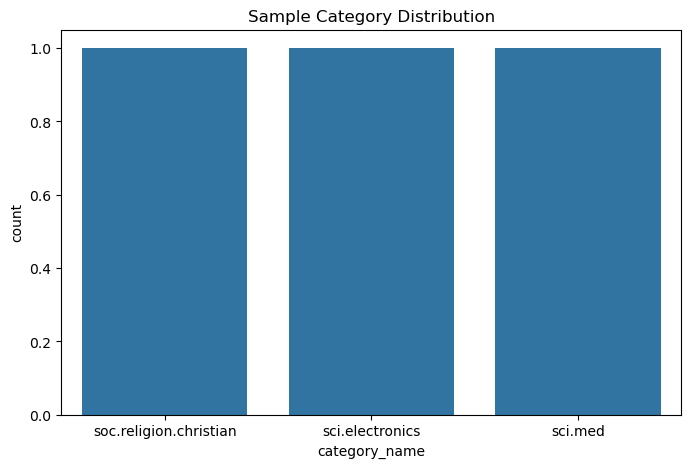

In [40]:
df_sample = df.sample(n=3)

plt.figure(figsize=(8, 5))
sns.countplot(data=df_sample, x='category_name')
plt.title('Sample Category Distribution')
plt.show()


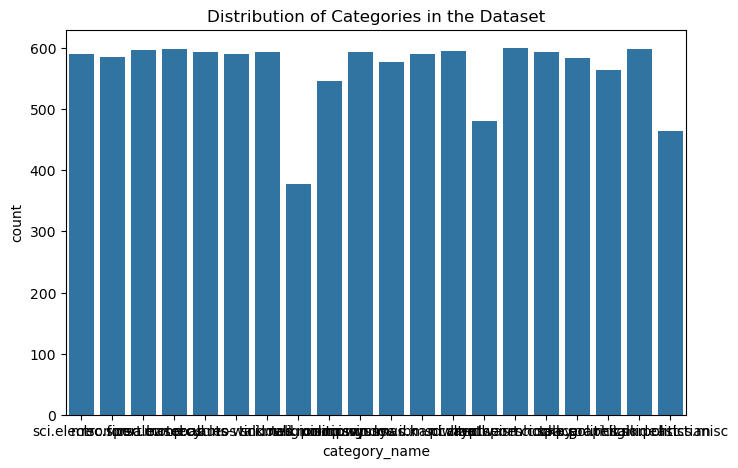

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='category_name')
plt.title('Distribution of Categories in the Dataset')
plt.show()

Exercise 7

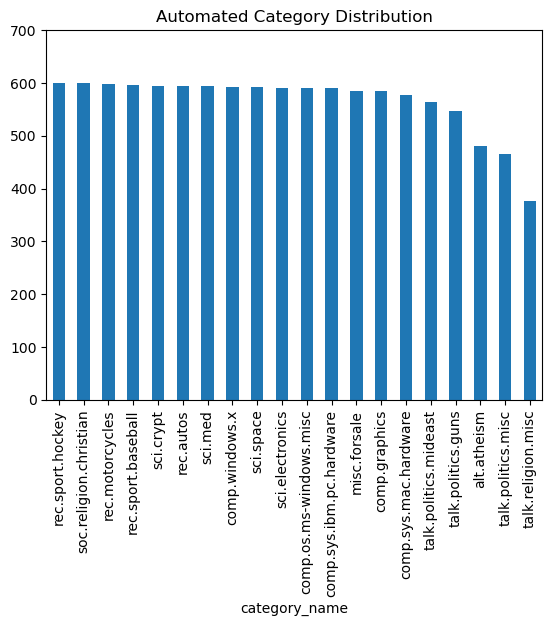

In [12]:
y_max = df['category_name'].value_counts().max()

df['category_name'].value_counts().plot(kind='bar', ylim=[0, y_max + 100])
plt.title('Automated Category Distribution')
plt.show()

Exercise 8 (side-by-side comparison of x dataframe and x_sample)

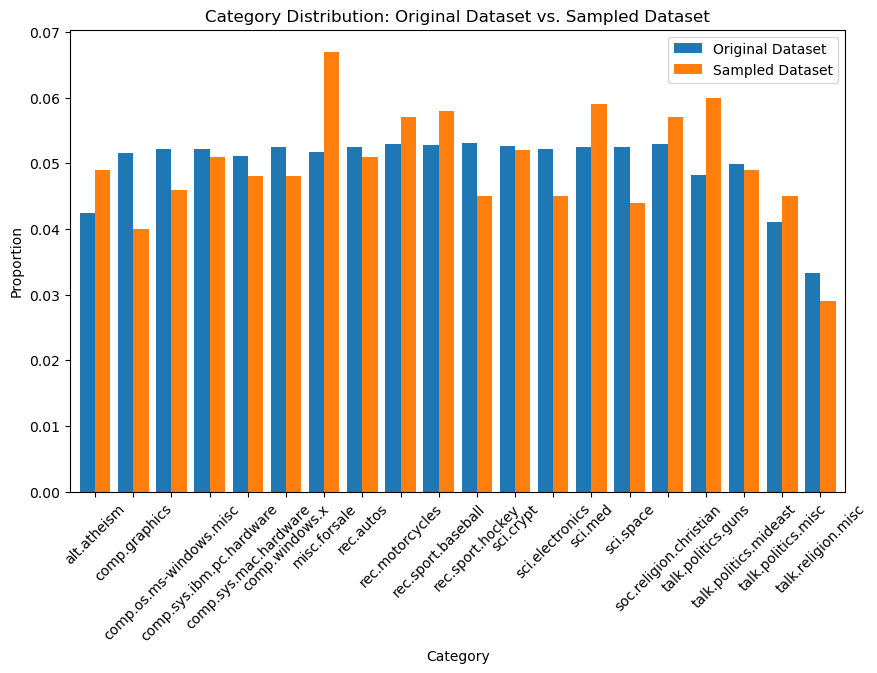

In [56]:
import matplotlib.pyplot as plt


original_distribution = X['category_name'].value_counts(normalize=True)  # Normalize to get proportions


sampled_distribution = X_sample['category_name'].value_counts(normalize=True)


distribution_df = pd.DataFrame({
    'Original Dataset': original_distribution,
    'Sampled Dataset': sampled_distribution
}).fillna(0)  # Fill NaN with 0 for any missing categories in the sampled data

# Plotting
distribution_df.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Category Distribution: Original Dataset vs. Sampled Dataset")
plt.xlabel("Category")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.show()

5.3 Feature subset selection

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])

print(X_counts[0])


  (0, 56979)	1
  (0, 125402)	2
  (0, 118043)	2
  (0, 86642)	3
  (0, 50527)	2
  (0, 33331)	2
  (0, 80016)	2
  (0, 111322)	1
  (0, 99721)	2
  (0, 64186)	1
  (0, 115475)	6
  (0, 114455)	12
  (0, 47729)	1
  (0, 42597)	2
  (0, 96493)	1
  (0, 90379)	1
  (0, 87905)	1
  (0, 89513)	1
  (0, 118981)	1
  (0, 40998)	1
  (0, 89362)	6
  (0, 80816)	1
  (0, 76032)	1
  (0, 9221)	1
  (0, 125265)	1
  :	:
  (0, 119781)	1
  (0, 90642)	1
  (0, 96346)	1
  (0, 47721)	1
  (0, 124332)	1
  (0, 71079)	1
  (0, 106030)	1
  (0, 41444)	1
  (0, 41614)	1
  (0, 106253)	1
  (0, 46364)	1
  (0, 102933)	1
  (0, 89496)	1
  (0, 13703)	1
  (0, 22455)	1
  (0, 119714)	1
  (0, 93582)	1
  (0, 8861)	1
  (0, 11676)	1
  (0, 9725)	1
  (0, 4156)	1
  (0, 8926)	1
  (0, 4469)	1
  (0, 15599)	1
  (0, 85829)	1


In [59]:
print(count_vect.get_feature_names_out()[0:56979])

['00' '000' '0000' ... 'frohardt' 'frolic' 'frolunda']


In [60]:
analyze=count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")
 # tokenization, remove stop words (e.g i, a, the), create n-gram (or unigram)

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

Exercise 9

In [61]:
# Ensure X[‘text’] contains text documents
tokenized_first_doc = analyze(X['text'].iloc[0])
print("Tokenized first document:", tokenized_first_doc)

# Apply analyzer across all text documents in X and create a new column for tokens
X['tokenized_text'] = X['text'].apply(analyze)
print(X[['text', 'tokenized_text']].head())


Tokenized first document: ['from', 'wtm', 'uhura', 'neoucom', 'edu', 'bill', 'mayhew', 'subject', 're', 'how', 'to', 'the', 'disks', 'copy', 'protected', 'organization', 'northeastern', 'ohio', 'universities', 'college', 'of', 'medicine', 'lines', '23', 'write', 'good', 'manual', 'to', 'go', 'with', 'the', 'software', 'the', 'hassle', 'of', 'photocopying', 'the', 'manual', 'is', 'offset', 'by', 'simplicity', 'of', 'purchasing', 'the', 'package', 'for', 'only', '15', 'also', 'consider', 'offering', 'an', 'inexpensive', 'but', 'attractive', 'perc', 'for', 'registered', 'users', 'for', 'instance', 'coffee', 'mug', 'you', 'could', 'produce', 'and', 'mail', 'the', 'incentive', 'for', 'couple', 'of', 'dollars', 'so', 'consider', 'pricing', 'the', 'product', 'at', '17', '95', 'you', 're', 'lucky', 'if', 'only', '20', 'of', 'the', 'instances', 'of', 'your', 'program', 'in', 'use', 'are', 'non', 'licensed', 'users', 'the', 'best', 'approach', 'is', 'to', 'estimate', 'your', 'loss', 'and', 'acco

In [67]:
X_counts.shape
count_vect.get_feature_names_out()[0:10]

X_counts.shape
X_counts[0:5, 0:100].toarray()

count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

Exercise 10

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Step 1: Extract the fifth record (index 4, since indexing is 0-based)
record_index = 4  # Index for the fifth record
record = X_counts[record_index]

# Step 2: Get non-zero term indices for this record
nonzero_indices = record.nonzero()[1]  # Only column indices are needed

# Step 3: Retrieve words where the count is 1
words_with_one_count = [count_vect.get_feature_names_out()[idx] for idx in nonzero_indices if record[0, idx] == 1]

print("Words with a count of 1 in the fifth record:", words_with_one_count)


Words with a count of 1 in the fifth record: ['from', 'subject', 'organization', 'lines', 'an', 'coffee', 'computer', 'sell', 'make', 'or', 'frp', 'frank', 'pereira', 'distribution', 'ba', 'corporation', 'nntp', 'posting', 'host', 'must', 'before', 'may', 'futon', 'high', 'end', 'oak', 'queen', '250', 'desk', 'roll', 'top', 'locks', 'securely', '100', 'color', 'tv', '13', 'perfect', 'cond', 'great', 'bedroom', '50', 'sold', 'tables', 'dresser', '40', 'lamps', 'offer', 'ask', 'esther', '415', '571', '6062', 'eve', '408', '736', '0490', 'day']


In [16]:
df_tokens = df[['text', 'tokens']]
print(df_tokens.head(3))

                                                text  \
0  From: wtm@uhura.neoucom.edu (Bill Mayhew)\nSub...   
1  From: andy@SAIL.Stanford.EDU (Andy Freeman)\nS...   
2  From: cs1442aq@news.uta.edu (cs1442aq)\nSubjec...   

                                              tokens  
0  [From, :, wtm, @, uhura.neoucom.edu, (, Bill, ...  
1  [From, :, andy, @, SAIL.Stanford.EDU, (, Andy,...  
2  [From, :, cs1442aq, @, news.uta.edu, (, cs1442...  


Exercise 11
    1. Calculate term frequencies across all documents
    2. Get indices of the top 50 most frequent terms
    3. Select a sample of 50 articles
    4. Create a DataFrame for the heatmap
    5. Plot the heatmap

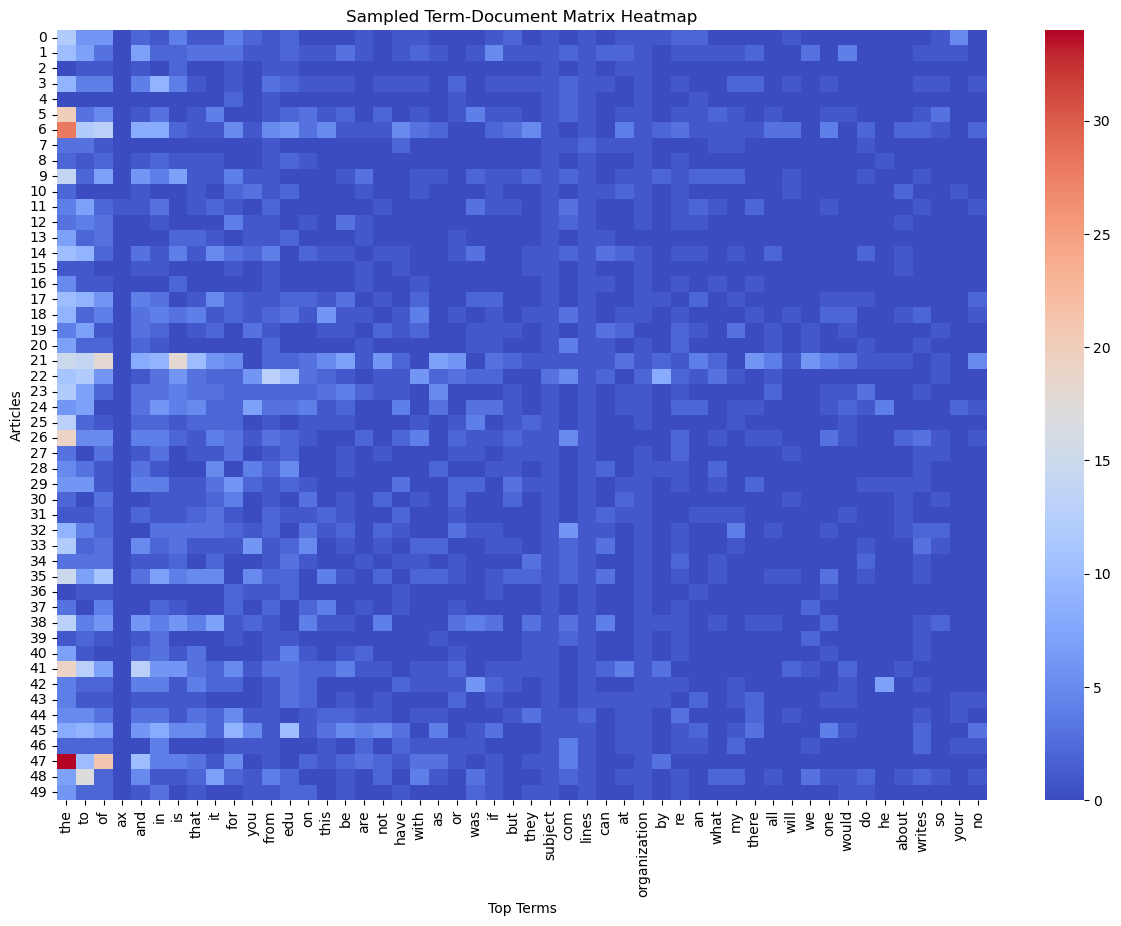

In [69]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

top_term_indices = np.argsort(term_frequencies)[-50:][::-1]  # Top 50 terms by frequency

article_sample = X_counts[:50, top_term_indices].toarray()  # Use top terms and a sample of 50 articles

df_heatmap = pd.DataFrame(article_sample, columns=count_vect.get_feature_names_out()[top_term_indices])


plt.figure(figsize=(15, 10))
sns.heatmap(df_heatmap, cmap='coolwarm', annot=False, cbar=True)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.xlabel("Top Terms")
plt.ylabel("Articles")
plt.show()


Exercise 12&13&14

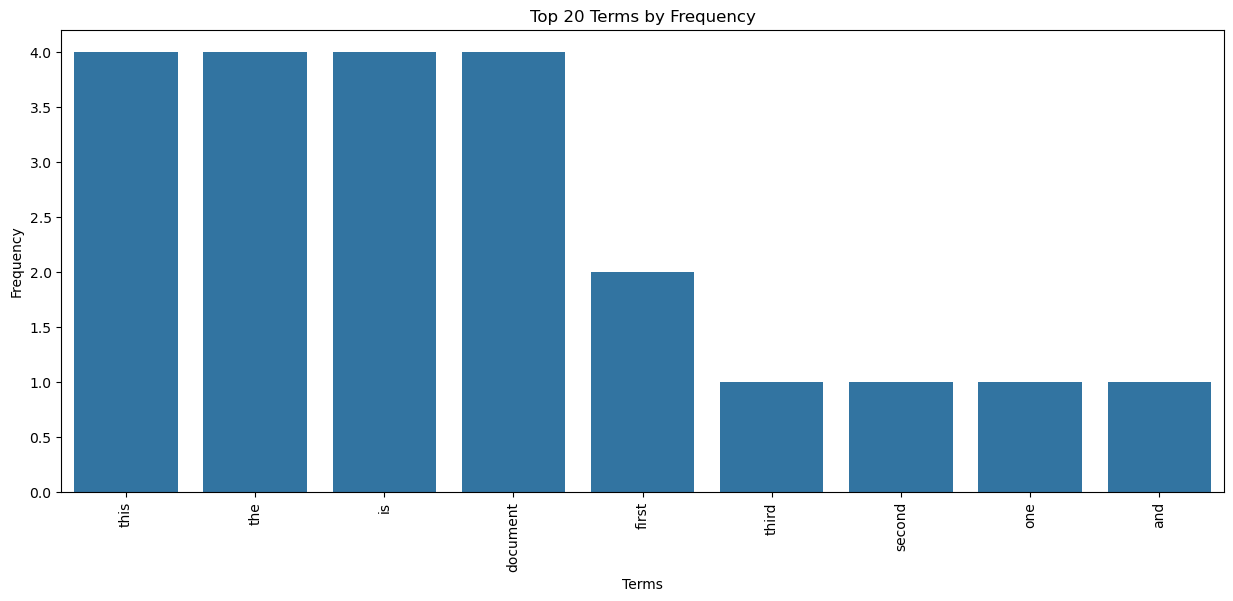

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 2: corpus
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

count_vect = CountVectorizer(max_features=300)  # Limit to 300 terms if needed
X_counts = count_vect.fit_transform(documents)

term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()  # Sum vertically
terms = count_vect.get_feature_names_out()

sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = terms[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

plt.figure(figsize=(15, 6))
sns.barplot(x=sorted_terms[:20], y=sorted_frequencies[:20])  # Top 20 terms
plt.xticks(rotation=90)
plt.xlabel("Terms")
plt.ylabel("Frequency")
plt.title("Top 20 Terms by Frequency")
plt.show()

fig = px.bar(x=sorted_terms[:20], y=sorted_frequencies[:20], labels={'x': 'Terms', 'y': 'Frequency'},
             title="Top 20 Terms by Frequency (Interactive)")
fig.update_layout(xaxis_tickangle=-45)
fig.show()


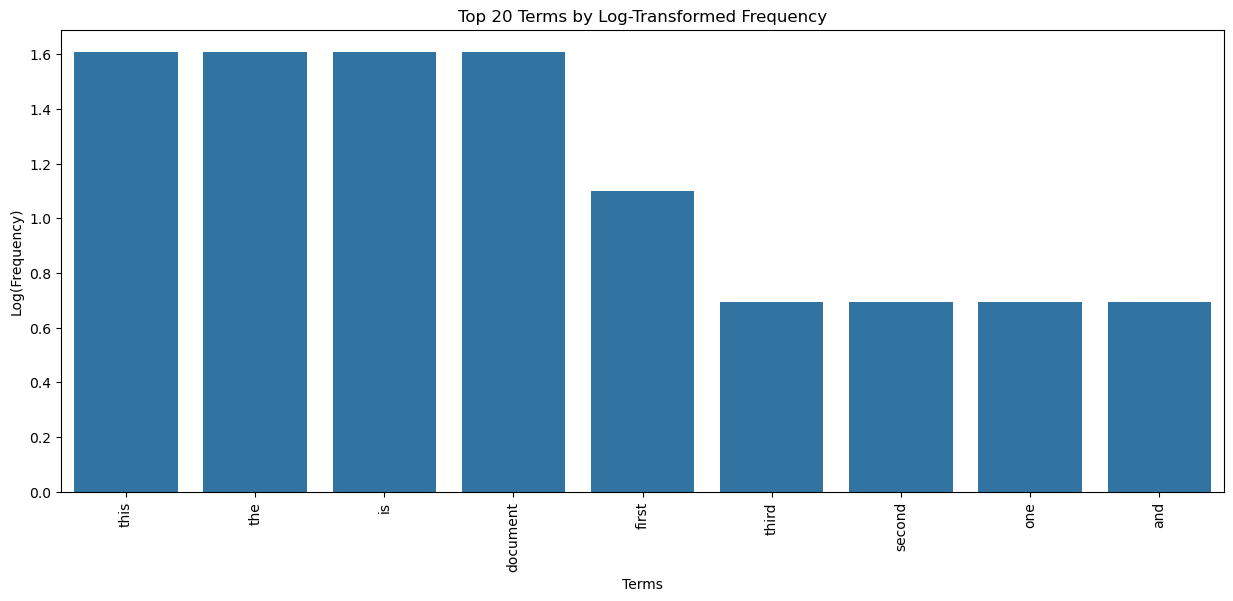

In [27]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


term_frequencies_log = [math.log(i + 1) for i in term_frequencies]

# Sort the Terms by Log Frequency for Better Visualization
sorted_indices = np.argsort(term_frequencies)[::-1]  # Sort by original frequencies
sorted_terms = count_vect.get_feature_names_out()[sorted_indices]
sorted_frequencies_log = np.array(term_frequencies_log)[sorted_indices]

plt.figure(figsize=(15, 6))
sns.barplot(x=sorted_terms[:20], y=sorted_frequencies_log[:20])  # Top 20 terms by frequency
plt.xticks(rotation=90)
plt.xlabel("Terms")
plt.ylabel("Log(Frequency)")
plt.title("Top 20 Terms by Log-Transformed Frequency")
plt.show()


Exercise 15

In the raw frequency chart, the highest frequency terms dominate, and lower frequency terms are hard to discern.
In the log-transformed chart, even terms with lower frequencies can be observed clearly, giving a fuller picture of the word distribution across documents.

In additiin, the log transformation scales down the differences between high-frequency and low-frequency terms, allowing for easier comparison. Terms with very high frequencies (which could otherwise overshadow less frequent terms) are scaled down, making the "long tail" of less frequent terms more visible.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.express as px

# Convert the text data into a document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])

# Sum up the counts of each term across all documents
term_frequencies = np.asarray(X_counts.sum(axis=0)).flatten()

# Get the feature (word) names
terms = count_vect.get_feature_names_out()

# Find the indices of the top 10 most frequent terms
sorted_terms = np.argsort(term_frequencies)[-10:][::-1]  # Indices of top 10 terms
sorted_term_names = terms[sorted_terms]  # Names of the top 10 terms

# Plot the top 10 words by frequency using Plotly
fig = px.bar(x=sorted_term_names, y=term_frequencies[sorted_terms], labels={'x':'Words', 'y':'Frequency'}, title='Top 10 Words by Frequency')
fig.show()


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

df = pd.DataFrame
X = df(data)

# Create separate DataFrames for each category
categories = X['category_name'].unique() # Get unique category labels
category_dfs = {} # Dictionary to store DataFrames for each category

for category in categories:
    category_dfs[category] = X[X['category_name'] == category].copy()

def create_term_document_df(df):
    count_vect = CountVectorizer() # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text']) # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

term_document_dfs = {} # Dictionary to store term-document DataFrames for each category

for category in categories:
    term_document_dfs[category] = create_term_document_df(category_dfs[category])

pd.set_option('display.max_rows', 100)  # Adjust to the number of rows you want to see
pd.set_option('display.max_columns', 20)  # Adjust to the number of columns you want to see
pd.set_option('display.width', 1000)  

category_number = 0  # You can change this to view different categories
selected_category = categories[category_number]

category_number = 0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
print(term_document_dfs[categories[category_number]])


Filtered Term-Document Frequency DataFrame for Category Category1:
   category  for  is  more  one  sample  text  this
0         1    1   1     0    1       1     1     1
1         1    1   0     1    1       0     1     0


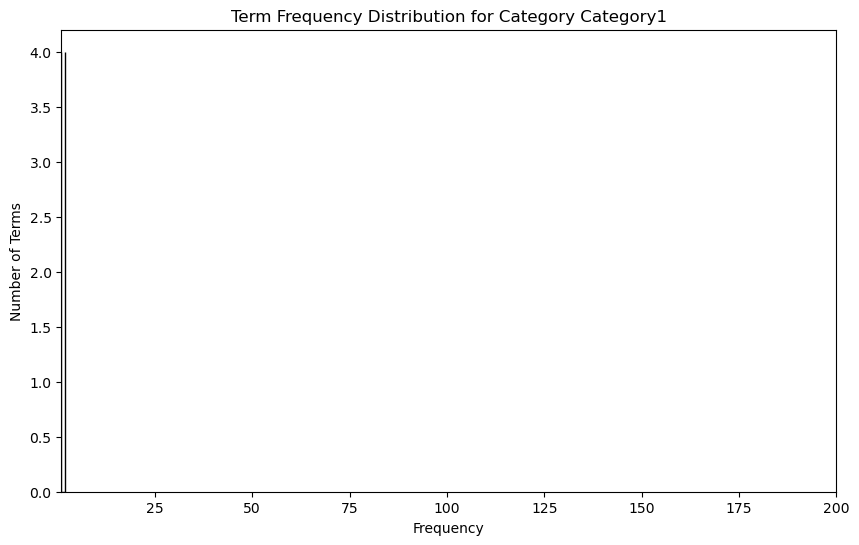

In [47]:
# Sum over all documents to get total frequency for each word
category_number=0 #You can change it from 0 to 3
word_counts = term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 # Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}') 
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()


Filtered Term-Document Frequency DataFrame for Category Category1:
Empty DataFrame
Columns: []
Index: [0, 1]


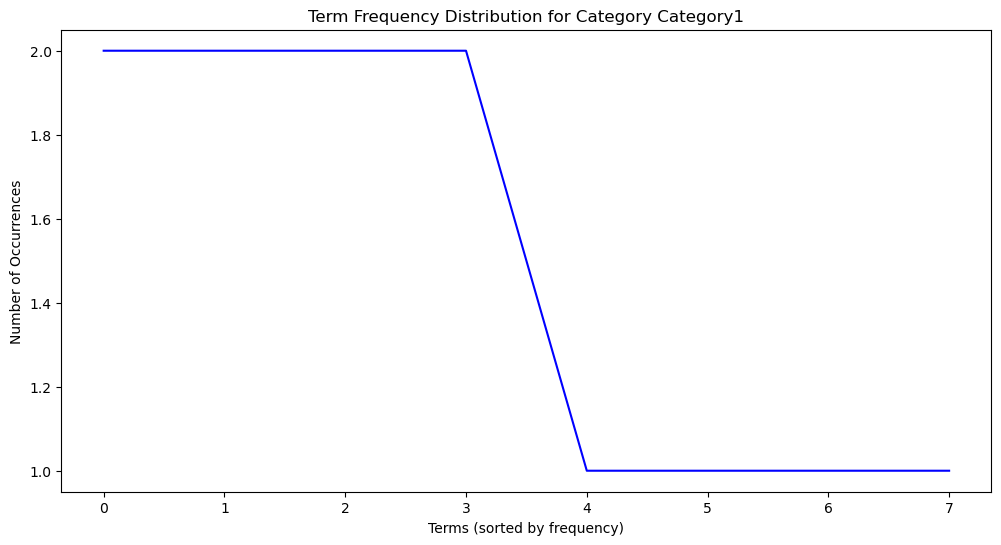

In [48]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt


category_number = 0  # Change this to select a different category
selected_category = categories[category_number]
term_document_df = term_document_dfs[selected_category]

# Step 2: Calculate term frequencies
term_frequencies = term_document_df.sum(axis=0)  # Sum the occurrences of each term across all documents

# Step 3: Sort terms by frequency in descending order
sorted_term_frequencies = term_frequencies.sort_values(ascending=False)

# Step 4: Filter to keep only the top X% of terms
top_percentage = 0.1  # Keep the top 10% most frequent terms, adjust as needed
num_terms_to_keep = int(len(sorted_term_frequencies) * top_percentage)
top_terms = sorted_term_frequencies.head(num_terms_to_keep).index

# Step 5: Create a filtered term-document matrix with only the top terms
filtered_term_document_df = term_document_df[top_terms]

# Step 6: Display the filtered term-document matrix
print(f"Filtered Term-Document Frequency DataFrame for Category {selected_category}:")
print(filtered_term_document_df)

plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(sorted_term_frequencies)), sorted_term_frequencies.values, color='blue')
plt.title(f'Term Frequency Distribution for Category {selected_category}')
plt.xlabel('Terms (sorted by frequency)')
plt.ylabel('Number of Occurrences')
plt.show()


In [38]:
import pandas as pd
import os

# List of CSV file paths
csv_file_paths = [
    '/Users/liaojingwen/Desktop/td_freq_db_comp_graphics.csv',
    '/Users/liaojingwen/Desktop/td_freq_db_sci_med.csv',
    '/Users/liaojingwen/Desktop/td_freq_db_soc_religion_christian.csv',
    '/Users/liaojingwen/Desktop/td_freq_db_alt_atheism.csv'
]

# Loop through each CSV file
for csv_file_path in csv_file_paths:
    # Load the CSV file
    df = pd.read_csv(csv_file_path)
    
    # Print column names to check what's available
    print(f"Columns in {os.path.basename(csv_file_path)}:", df.columns)
    
    # Assuming the column name is actually 'freq' instead of 'frequency'
    # Apply a filter if the column exists; otherwise, proceed without filtering
    if 'freq' in df.columns:
        df_filtered = df[df['freq'] >= 1]
    else:
        df_filtered = df  # Use the DataFrame as-is if 'freq' or similar column isn't found
    
    # Define a safe filename based on the original file name
    # Extract the category from the original file name, e.g., "comp_graphics"
    category_safe = os.path.splitext(os.path.basename(csv_file_path))[0].split('_')[-1]
    
    # Save the filtered DataFrame as a new CSV file
    output_file_path = f'/Users/liaojingwen/Desktop/td_freq_db_{category_safe}_filtered.csv'
    df_filtered.to_csv(output_file_path, index=False)
    
    print(f"Filtered data saved to {output_file_path}")

    # Load the CSV file
df = pd.read_csv(csv_file_path)

# Print column names to check what’s available
print("Columns in the CSV file:", df.columns)

# Assuming the column name is actually 'freq' instead of 'frequency'
# Apply a filter if the column exists; otherwise, proceed without filtering
if 'freq' in df.columns:
    df_filtered = df[df['freq'] >= 1]
else:
    df_filtered = df  # Use the DataFrame as-is if 'freq' or similar column isn't found

# Define a safe filename
category_safe = 'comp_graphics'

# Save the DataFrame as a new CSV file
df_filtered.to_csv(f'td_freq_db_{category_safe}.csv', index=False)



Columns in td_freq_db_comp_graphics.csv: Index(['071\t0hb\t477\t8000\t8565\tcollier\tconverting\tec1v\thampton\thpgl\tiii\timg\tlaserjet\tlondon\tpd\tplotter\tsd345\ttga\ttif\tunit\tutility\tx3769'], dtype='object')
Filtered data saved to /Users/liaojingwen/Desktop/td_freq_db_graphics_filtered.csv
Columns in td_freq_db_sci_med.csv: Index(['241\t408\t57\t9760\tacne\tactrix\tafterwards\taldridge\talone\talong\tappearance\tappropriate\tbath\tbathwater\tbecoming\tbelief\tblack\tblackheads\tbought\tbury\tcame\tcap\tchance\tchemist\tchin\tchurchill\tclearasil\tcloths\tcommunication\tconvinced\tcosmetic\tcounter\tcradle\tdalacin\tdandruff\tdefect\tdip\tdisfiguring\tdry\tequipment\tescalate\teventually\tfast\tfather\tfigure\tfrequent\tgen\tgoes\tgrease\tgreasy\tguest\thair\thairline\thidden\timmediately\tinclined\tincredible\tindustry\tiodine\tjackie\tjacquelin\tkeeping\tkid\tkids\tleave\tlimp\tloves\tluck\tlucky\tlukewarm\tmalady\tmineral\tmiserable\tmisery\tmousse\tnaturally\tneighbour\tnose

In [71]:
for category, df in term_document_dfs.items():
    category_safe = category.replace('.', '_')
    df.to_csv(f'td_freq_db_{category_safe}.csv')


Database size (total no of transactions) : 480
Number of items : 11250
Minimum Transaction Size : 5
Average Transaction Size : 75.59791666666666
Maximum Transaction Size : 1395
Standard Deviation Transaction Size : 105.33869380396925
Variance in Transaction Sizes : 11119.405841162143
Sparsity : 0.9932801851851852


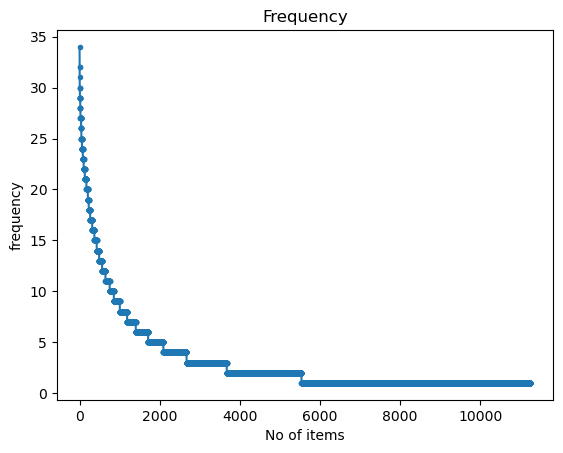

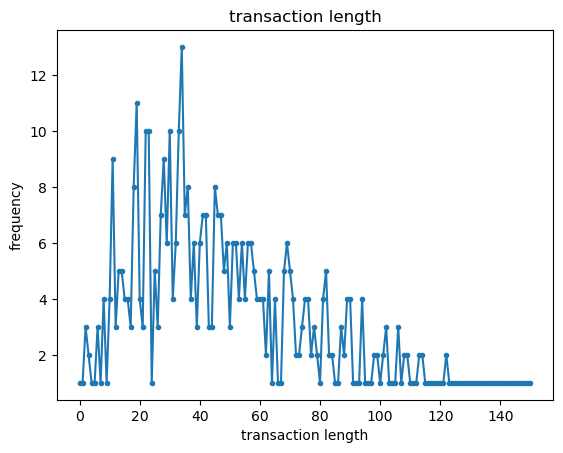

In [72]:
from PAMI.extras.dbStats import TransactionalDatabase as tds 

dataset_path = "/Users/liaojingwen/Desktop/td_freq_db_comp_graphics.csv/"

obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv') 


obj.run()
obj.printStats()
obj.plotGraphs()


Database size (total no of transactions) : 584
Number of items : 12130
Minimum Transaction Size : 3
Average Transaction Size : 45.113013698630134
Maximum Transaction Size : 1826
Standard Deviation Transaction Size : 131.51173538119104
Variance in Transaction Sizes : 17325.002643389176
Sparsity : 0.9962808727371286


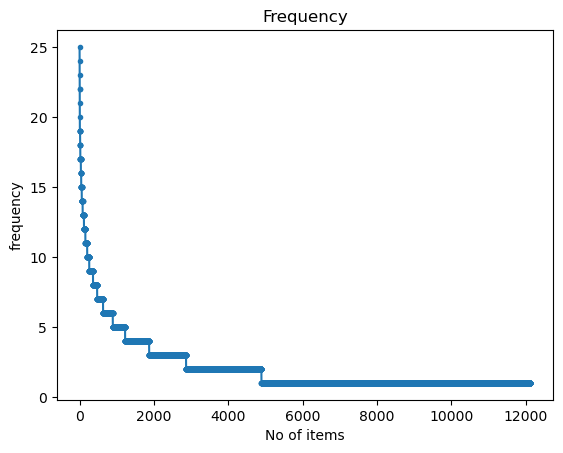

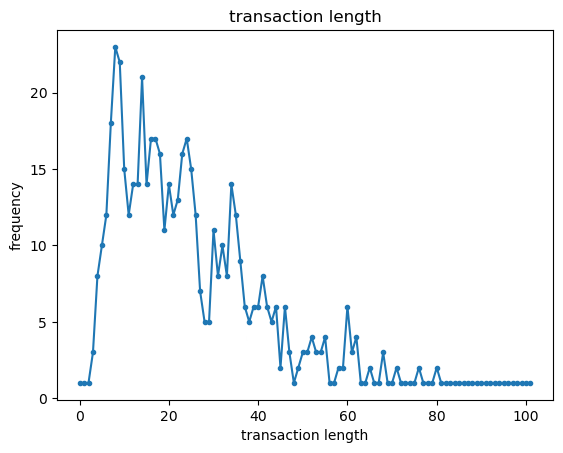

In [ ]:
from PAMI.extras.dbStats import TransactionalDatabase as tds 

dataset_path = "/Users/liaojingwen/Desktop/td_freq_db_comp_graphics.csv/"

obj = tds.TransactionalDatabase('td_freq_db_comp_graphics.csv') 


obj.run()
obj.printStats()
obj.plotGraphs()


In [4]:
import PAMI
print(dir(PAMI))



['__author__', '__builtins__', '__cached__', '__credits__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'extras']


Exercise 17

In [5]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import time

# List of paths to the processed 'comp.graphics' and other categories
database_paths = [
    '/Users/liaojingwen/Desktop/td_freq_db_comp_graphics.csv',
    '/Users/liaojingwen/Desktop/td_freq_db_sci_med.csv',
    '/Users/liaojingwen/Desktop/td_freq_db_soc_religion_christian.csv',
    '/Users/liaojingwen/Desktop/td_freq_db_alt_atheism.csv'
]

def load_data(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Assuming the data is in a transaction format where each row is a list of items
    # Example format: [['item1', 'item2'], ['item3', 'item1'], ...]
    # Convert the DataFrame to a list of lists for TransactionEncoder
    transactions = df.values.tolist()
    
    # Use TransactionEncoder to convert the transaction list into a one-hot encoded DataFrame
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    one_hot_df = pd.DataFrame(te_ary, columns=te.columns_)

    return one_hot_df

def run_fp_growth(database, min_support_values):
    print("\nRunning FP-Growth Algorithm")
    for min_support in min_support_values:
        print(f"\nTesting with minimum support = {min_support}")
        start_time = time.time()

        # Run the FP-Growth algorithm with the given minimum support
        frequent_itemsets = fpgrowth(database, min_support=min_support, use_colnames=True)

        runtime = time.time() - start_time
        print(f"Runtime for min_support={min_support}: {runtime:.4f} seconds")
        print(f"Number of patterns found: {len(frequent_itemsets)}")
        print("Sample patterns:\n", frequent_itemsets.head(10), "\n")  # Displaying the first 10 patterns

# Loop through each CSV file, load the data, and run FP-Growth
min_support_values = [0.01, 0.05, 0.1]  # These are example thresholds as percentages
for path in database_paths:
    print(f"\nProcessing dataset: {path}")
    data = load_data(path)

    # Run the FP-Growth algorithm for this dataset
    run_fp_growth(data, min_support_values)



Processing dataset: /Users/liaojingwen/Desktop/td_freq_db_comp_graphics.csv

Running FP-Growth Algorithm

Testing with minimum support = 0.01
Runtime for min_support=0.01: 0.0036 seconds
Number of patterns found: 0
Sample patterns:
 Empty DataFrame
Columns: [support, itemsets]
Index: [] 


Testing with minimum support = 0.05
Runtime for min_support=0.05: 0.0013 seconds
Number of patterns found: 0
Sample patterns:
 Empty DataFrame
Columns: [support, itemsets]
Index: [] 


Testing with minimum support = 0.1
Runtime for min_support=0.1: 0.0014 seconds
Number of patterns found: 0
Sample patterns:
 Empty DataFrame
Columns: [support, itemsets]
Index: [] 


Processing dataset: /Users/liaojingwen/Desktop/td_freq_db_sci_med.csv

Running FP-Growth Algorithm

Testing with minimum support = 0.01
Runtime for min_support=0.01: 0.0014 seconds
Number of patterns found: 0
Sample patterns:
 Empty DataFrame
Columns: [support, itemsets]
Index: [] 


Testing with minimum support = 0.05
Runtime for min_sup

Comparison of Algorithms:

    FAE Top-K:
This algorithm is designed to find the top K frequent patterns, regardless of their support, making it more likely to find a diverse set of patterns.
However, if the patterns themselves do not meet the minimum frequency criteria, you may not see a difference in results from FP-Growth.
    MaxFPGrowth:
This variant of FP-Growth focuses on finding maximal patterns, which can lead to discovering longer itemsets that are not subsets of any other frequent itemsets.
Given that no patterns were found in FP-Growth, it's likely that MaxFPGrowth would yield similar results unless there are specific patterns that only MaxFPGrowth can find due to its focus on maximality.

Observations on Parameter Sensitivity
(Sensitivity to Changes)

    FAE Top-K:
Sensitive to the choice of k. Larger k values could lead to more diverse patterns but might dilute the quality of patterns found.
    MaxFPGrowth:
Sensitive to minimum support. As you've seen, the absence of patterns at certain support levels indicates that it heavily relies on the chosen threshold.

In [12]:
import PAMI
print(dir(PAMI))



['__author__', '__builtins__', '__cached__', '__credits__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'extras']


In [25]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the paths to your text files directly in a list
text_file_paths = [
    '/Users/liaojingwen/Desktop/freq_patterns_comp_graphics_minSup9.txt',
    '/Users/liaojingwen/Desktop/freq_patterns_sci_med_minSup9.txt',
    '/Users/liaojingwen/Desktop/freq_patterns_soc_religion_minSup9.txt',
    '/Users/liaojingwen/Desktop/freq_patterns_alt_atheism_minSup9.txt'
]

# List to hold the text data from each file
text_data = []

# Read each text file in the specified list
for file_path in text_file_paths:
    if file_path.endswith('.txt'):  # Process only .txt files
        with open(file_path, 'r', encoding='utf-8') as file:
            text_content = file.read()
            text_data.append(text_content)  # Add the content to the list

# Create a DataFrame from the text data
X = pd.DataFrame({'text': text_data})

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # Fit and transform the text data
terms = count_vect.get_feature_names_out()    # Get original terms in the vocabulary

# Tokenize the sentences into sets of unique words (optional)
X['tokenized_text'] = X['text'].str.split().apply(set)

# Define your patterns (you can modify these patterns as needed)
final_pattern_df = pd.DataFrame({
    'Patterns': [
        "first document",
        "this is",
        "third one",
        "document"
        # Add more patterns as needed
    ]
})

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

# Display the augmented DataFrame
print(augmented_df)


   000  01  0358  04  07  08  09     10  100    11  ...  yours  yourself  \
0    1   1     0   1   0   0   0  16508    0  8280  ...      0         0   
1    0   0     0   0   0   0   0   4564    0  4263  ...      0         1   
2    0   0  4096   1   1   1   1    336    1   241  ...     32         0   
3    1  16     0   0   0   0   0    219    0   476  ...      1         1   

   yourselves  z5  zhenghao  zyeh  first document  this is  third one  \
0           0   0         8     8               0        0          0   
1           0   0         0     0               0        0          0   
2           1   2         0     0               0        0          0   
3           0   0         0     0               0        0          0   

   document  
0         0  
1         0  
2         0  
3         0  

[4 rows x 2863 columns]


/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


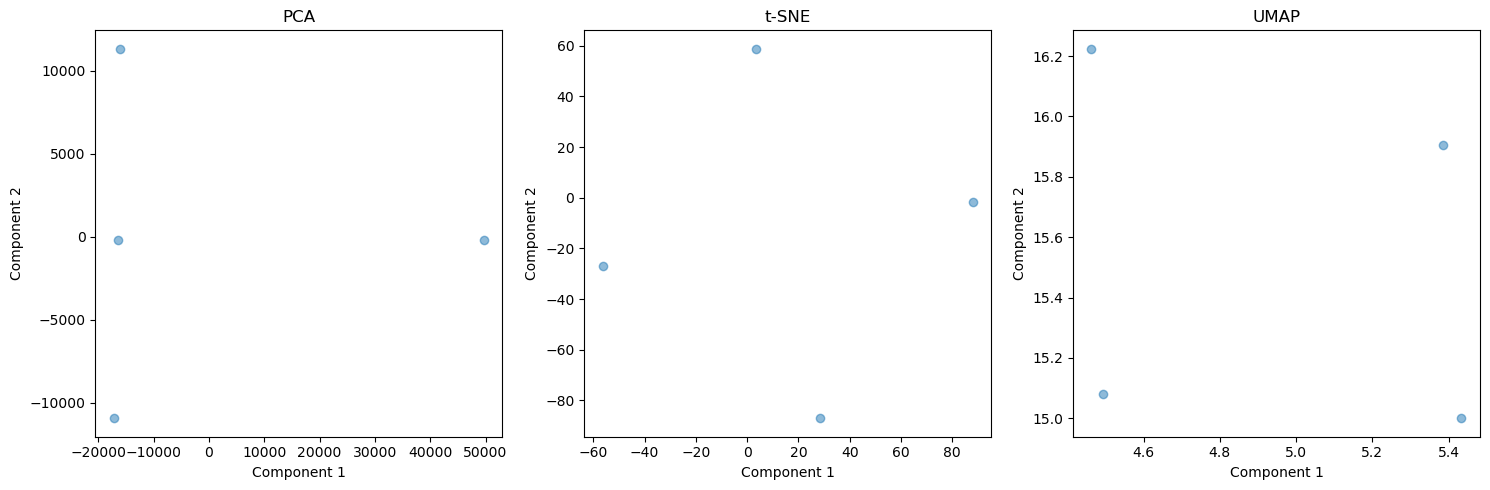

In [29]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 
import umap
import matplotlib.pyplot as plt

# Assuming `tdm_df` is already defined as your term-document matrix

# This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data with 2 components
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values) 
X_tsne_tdm = TSNE(n_components=2, perplexity=min(30, len(tdm_df) - 1)).fit_transform(tdm_df.values) 
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

# Optionally, plot the results
plt.figure(figsize=(15, 5))

# PCA Plot
plt.subplot(1, 3, 1)
plt.scatter(X_pca_tdm[:, 0], X_pca_tdm[:, 1], alpha=0.5)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# t-SNE Plot
plt.subplot(1, 3, 2)
plt.scatter(X_tsne_tdm[:, 0], X_tsne_tdm[:, 1], alpha=0.5)
plt.title('t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# UMAP Plot
plt.subplot(1, 3, 3)
plt.scatter(X_umap_tdm[:, 0], X_umap_tdm[:, 1], alpha=0.5)
plt.title('UMAP')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


Length of text_data: 4
Length of categories: 4
Text data contents:
0: individual:9
certain:9
hall:9
mike:9
vr:9
clock:9
...
1: leave:9
swell:9
color:9
confused:9
learning:9
occu...
2: latest:9
san:9
seven:9
schools:9
chose:9
wedding:9...
3: choices:9
corp:9
hausmann:9
hausmann	maddi:9
kids:...
Categories:
comp_graphics
sci_med
soc_religion_christian
alt_atheism


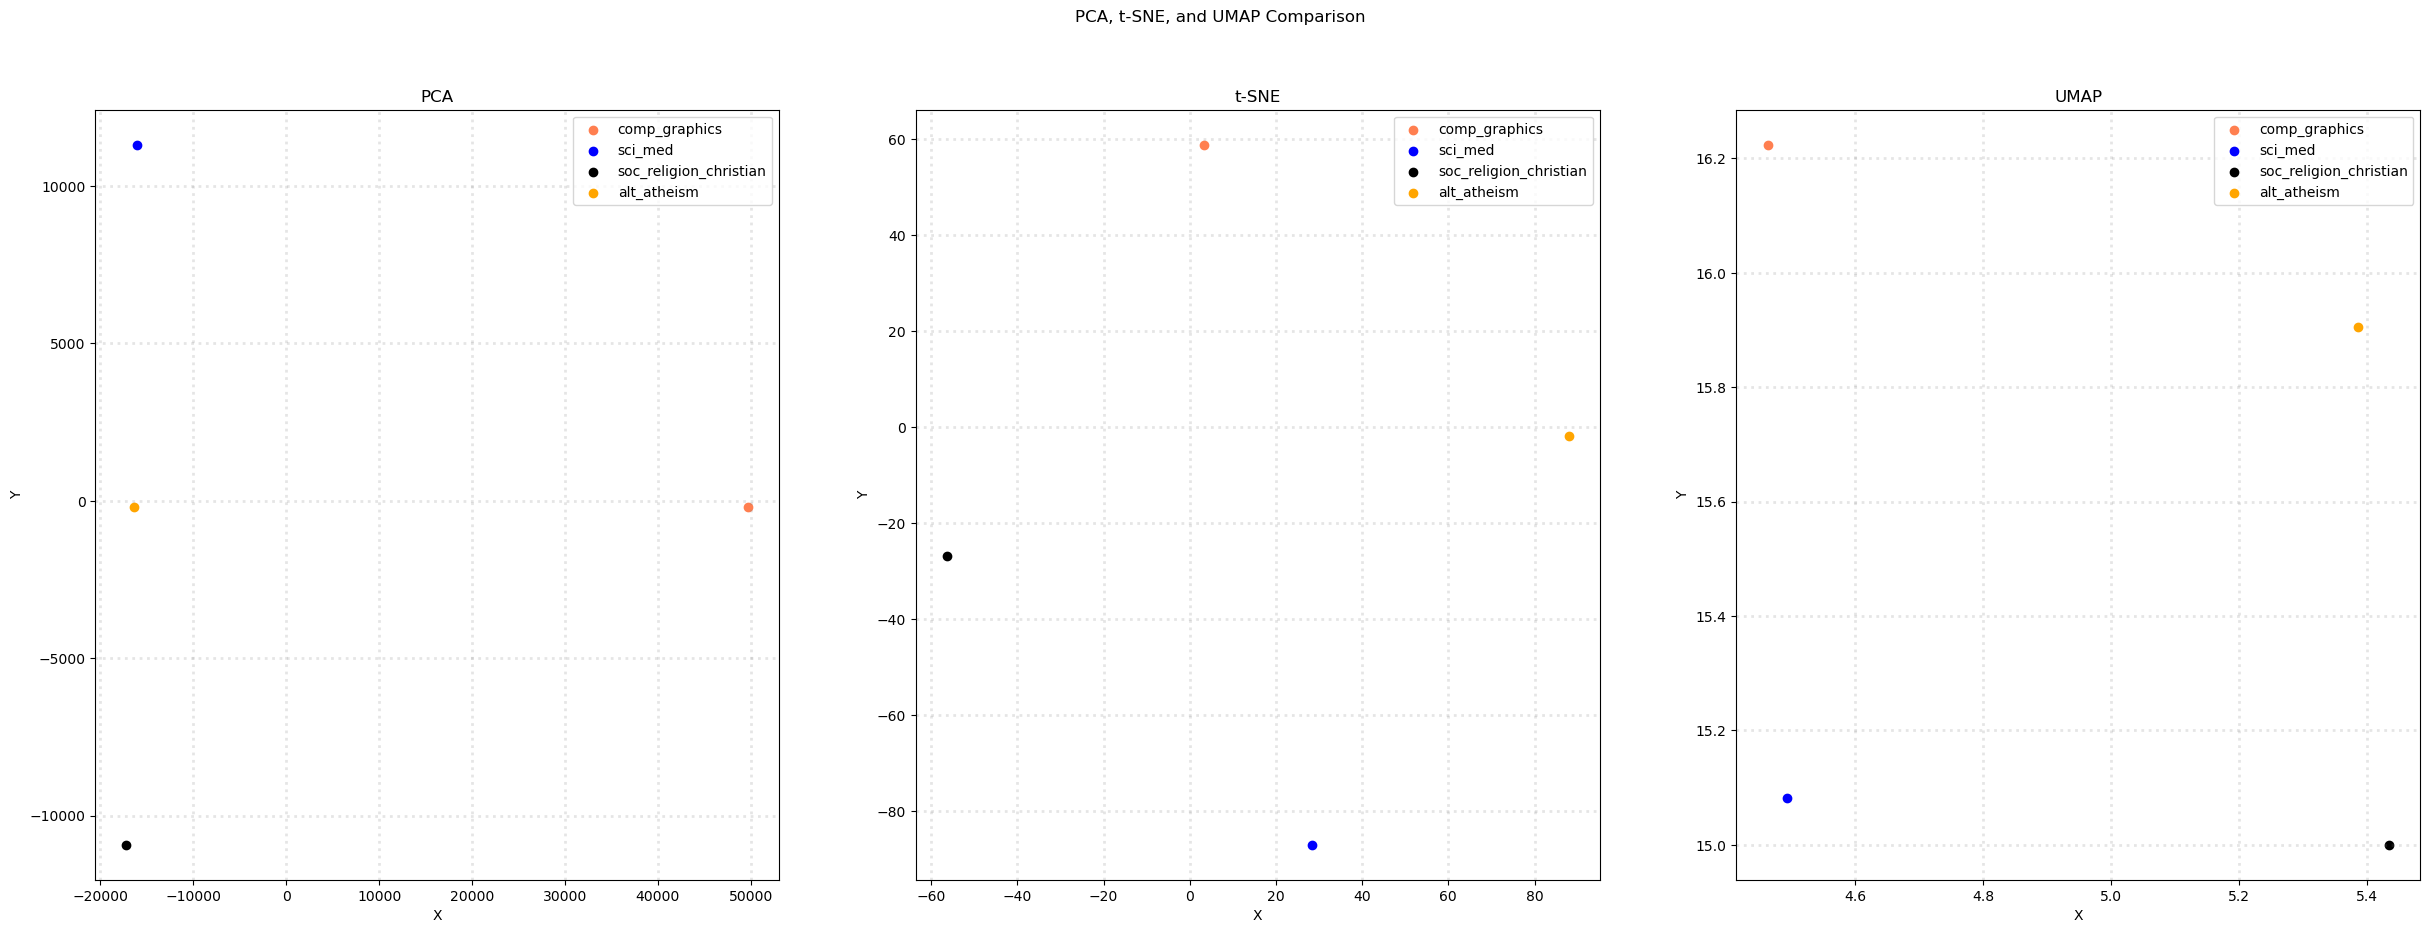

In [36]:
import os
import pandas as pd

# Define the directory containing your text files
text_file_directory = [
    '/Users/liaojingwen/Desktop/freq_patterns_comp_graphics_minSup9.txt',
    '/Users/liaojingwen/Desktop/freq_patterns_sci_med_minSup9.txt',
    '/Users/liaojingwen/Desktop/freq_patterns_soc_religion_minSup9.txt',
    '/Users/liaojingwen/Desktop/freq_patterns_alt_atheism_minSup9.txt'
]

# List to hold the text data and their categories
text_data = []
categories = []

# Define category names corresponding to each text file
category_names = ['comp_graphics', 'sci_med', 'soc_religion_christian', 'alt_atheism']

# Read each text file and assign a category
for file_path, category in zip(text_file_directory, category_names):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            text_content = file.read()
            text_data.append(text_content)  # Add the content to the list
            categories.append(category)  # Add the category for this text entry
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Print lengths and contents for debugging
print(f"Length of text_data: {len(text_data)}")
print(f"Length of categories: {len(categories)}")
print("Text data contents:")
for i, text in enumerate(text_data):
    print(f"{i}: {text[:50]}...")  # Print first 50 characters for brevity

print("Categories:")
for cat in categories:
    print(cat)

# Create a DataFrame from the text data and category information
if len(text_data) == len(categories):
    X = pd.DataFrame({'text': text_data, 'category_name': categories})
else:
    raise ValueError("The length of text_data and categories does not match!")

# Now you can perform PCA, t-SNE, and UMAP
# (Assuming X_tdm, X_pca_tdm, X_tsne_tdm, and X_umap_tdm are already computed)

# Set up colors and unique categories
col = ['coral', 'blue', 'black', 'orange'] 
categories = X['category_name'].unique()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        # Ensure the DataFrame has the correct indexing
        xs = X_reduced[X['category_name'] == category][:, 0]  # Use numpy array for indexing
        ys = X_reduced[X['category_name'] == category][:, 1]  
        ax.scatter(xs, ys, c=c, marker='o', label=category)

    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2) 
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()  # Display the plots
